Importing the Dependencies

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Load the Dataset

In [4]:
# loading the dataset
df = pd.read_csv('/content/retail_price.csv')

In [5]:
# number of rows and columns in the dataset
df.shape

(676, 30)

In [6]:
# printing the first 5 rows of the dataset
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [7]:
# printing the last 5 rows of the dataset
df.tail()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000
675,bed5,bed_bath_table,01-09-2017,32,5222.36,24.324687,163.398710,56,162,5,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,199.509804


In [8]:
# finding missing values
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [9]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [10]:
# description of the dataset
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [11]:
df["month_year"].unique()

array(['01-05-2017', '01-06-2017', '01-07-2017', '01-08-2017',
       '01-09-2017', '01-10-2017', '01-11-2017', '01-12-2017',
       '01-01-2018', '01-02-2018', '01-03-2018', '01-04-2018',
       '01-05-2018', '01-06-2018', '01-07-2018', '01-08-2018',
       '01-03-2017', '01-04-2017', '01-02-2017', '01-01-2017'],
      dtype=object)

**Exploratory Data Analysis**

Columns Distribution

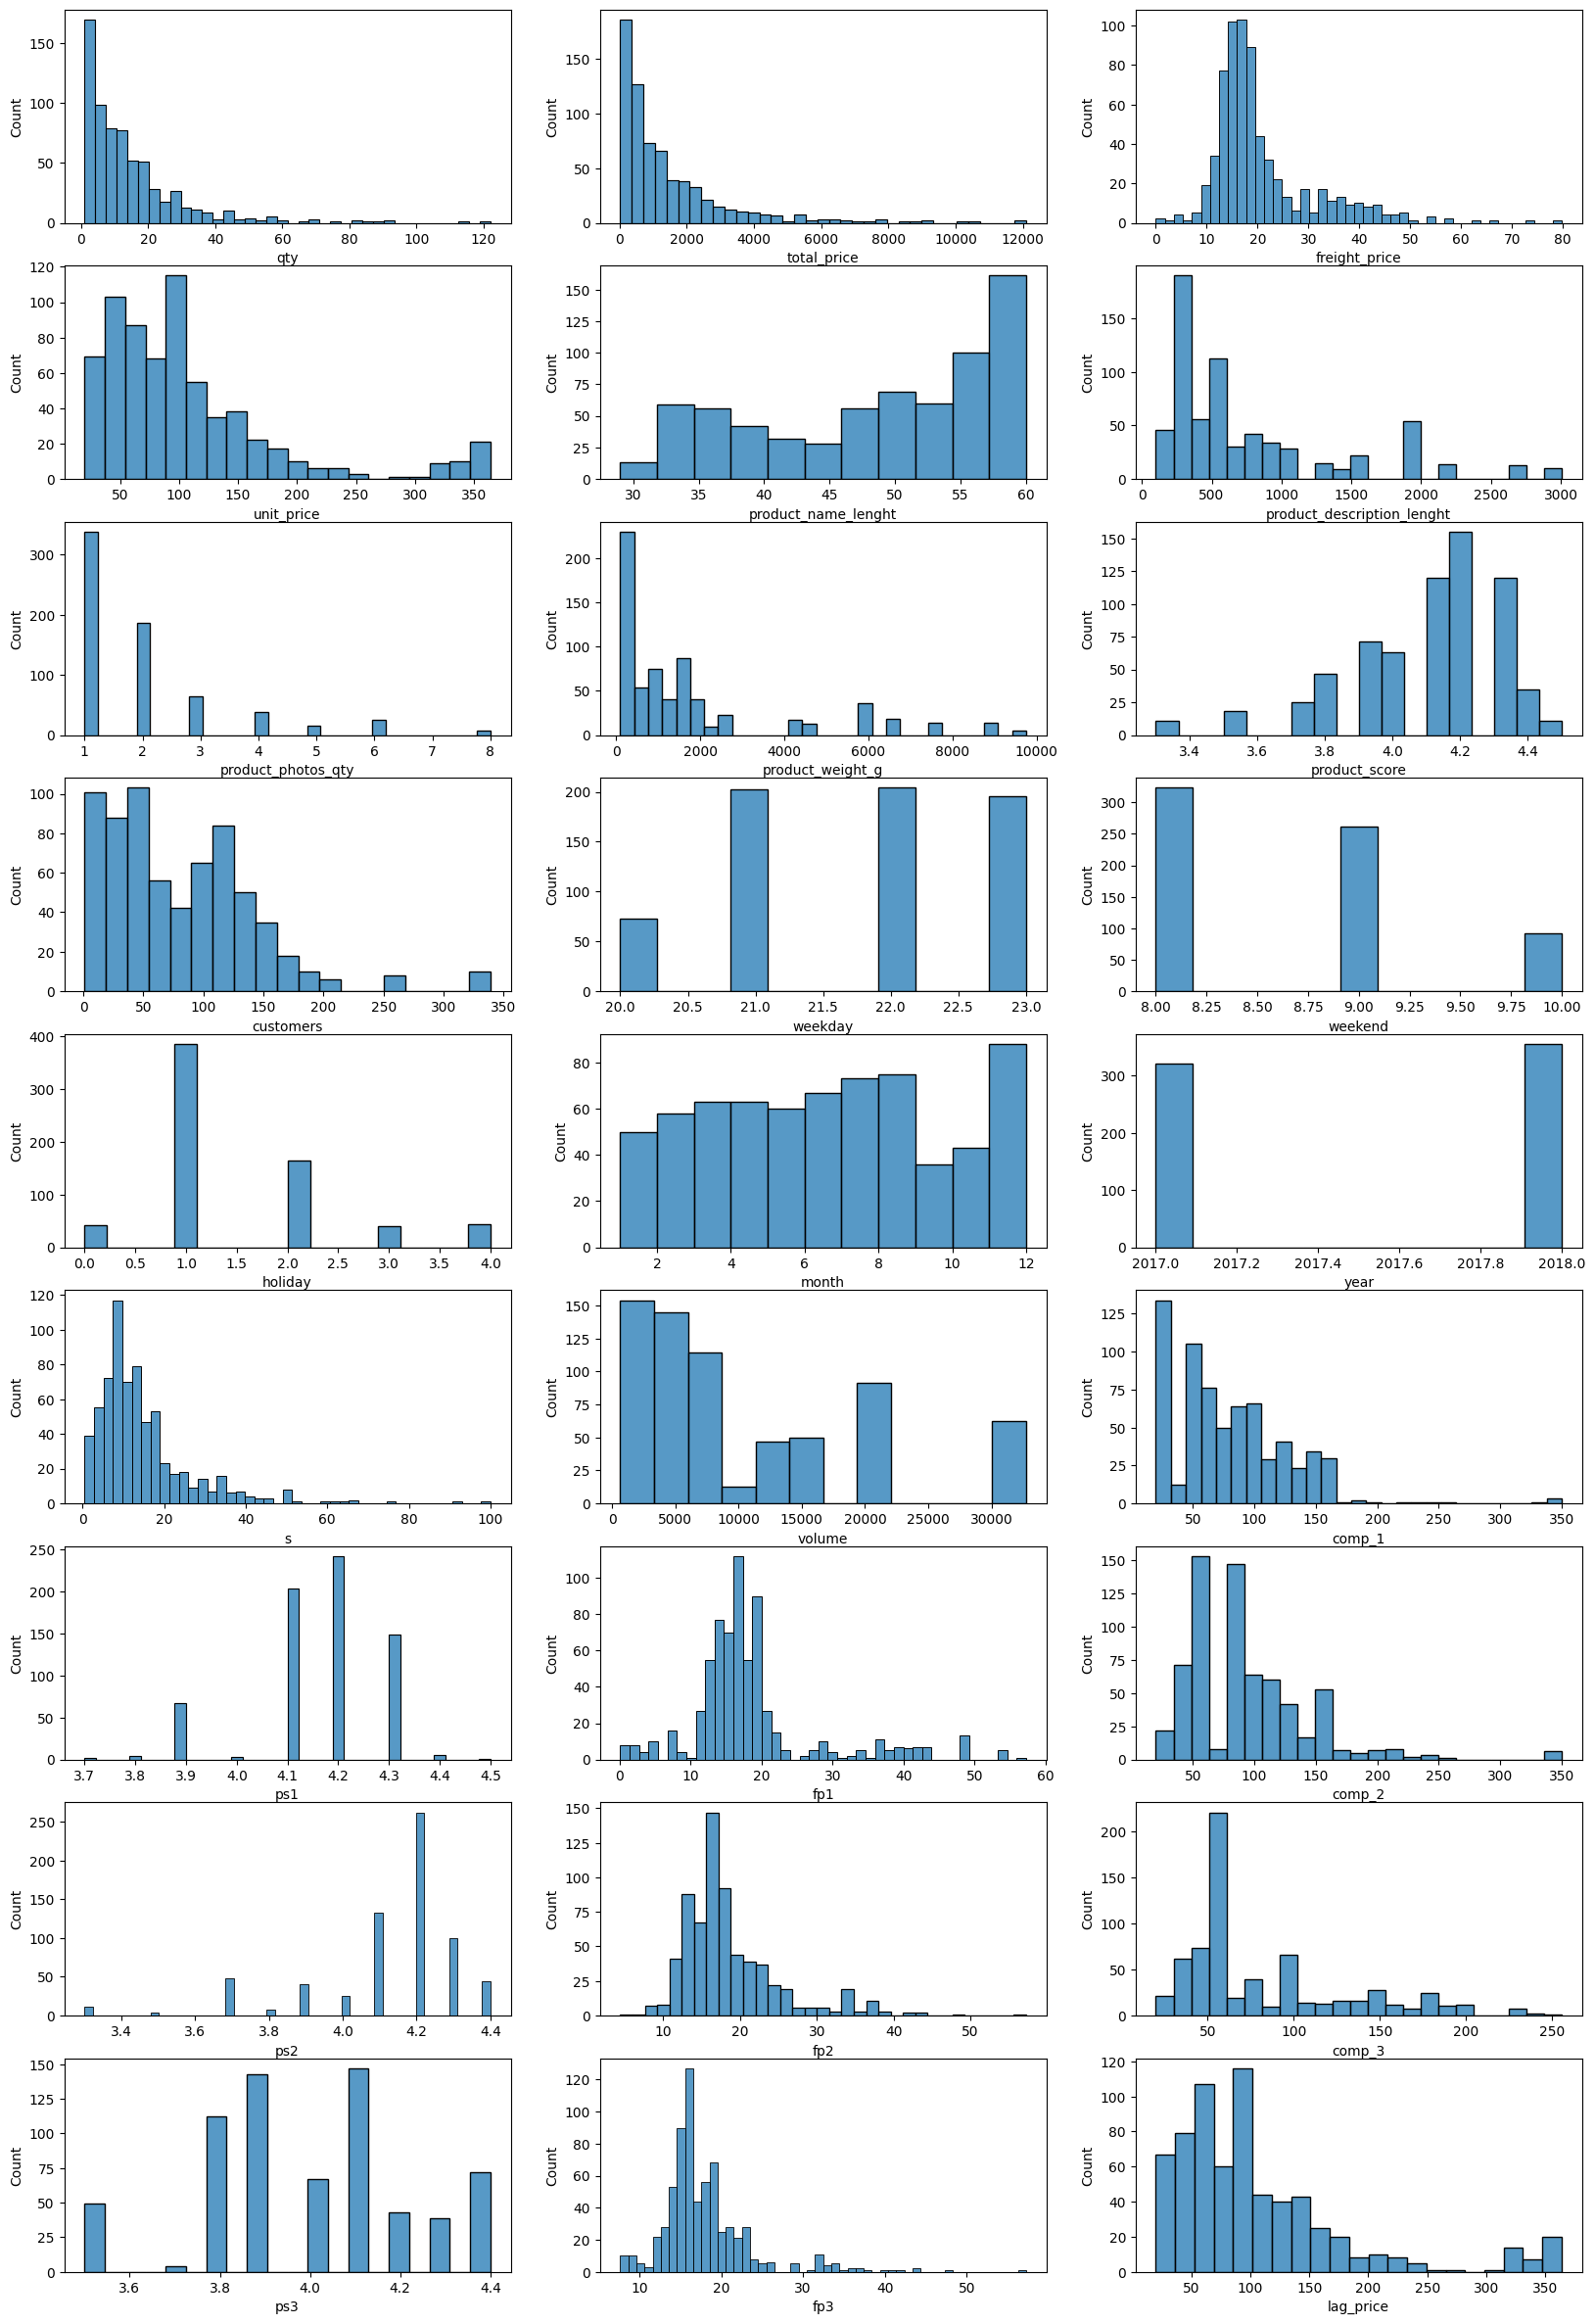

In [12]:
def distribution(df):
    """
    Plot the distribution of a column in a dataframe using seaborn.
    """
    fig, axes = plt.subplots(9, 3, figsize=(20, 30))
    for i, col in enumerate(df.columns):
        ax = axes[i//3-1, i%3]
        if df[col].dtype == "object":
            continue
        sns.histplot(df[col], ax=ax)
        # plt.title(col)

    plt.savefig("distribution.png")
    plt.show()
distribution(df)
plt.close()

Outlier detection

In [13]:
def detect_outliers(df, col):
    """
    Detect outliers in a column of a dataframe
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return df[(df[col] > upper_bound) | (df[col] < lower_bound)]
for col in df.columns:
    if df[col].dtype != 'object':
        print(col, detect_outliers(df, col).shape[0])

qty 42
total_price 46
freight_price 76
unit_price 45
product_name_lenght 0
product_description_lenght 91
product_photos_qty 87
product_weight_g 117
product_score 11
customers 18
weekday 0
weekend 0
holiday 44
month 0
year 0
s 53
volume 0
comp_1 9
ps1 79
fp1 96
comp_2 17
ps2 156
fp2 44
comp_3 58
ps3 121
fp3 50
lag_price 45


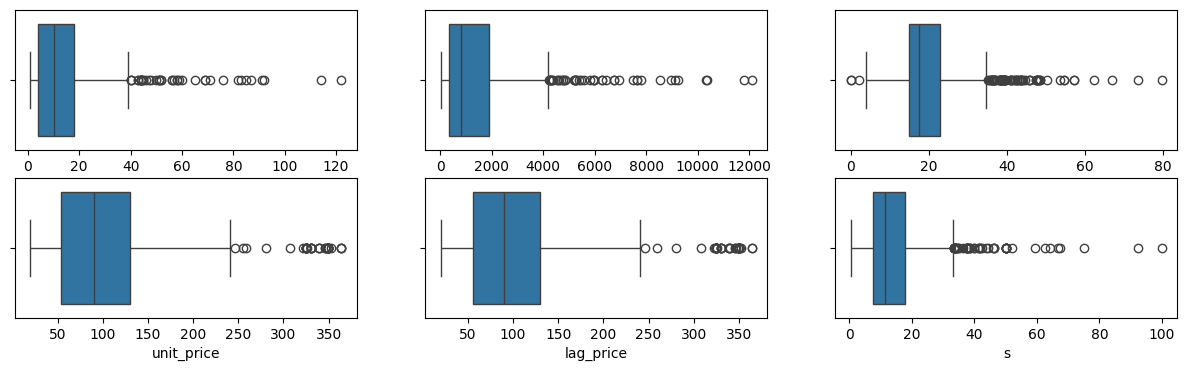

In [14]:
def boxplot(df, cols):
    """
    Plot boxplot of a column of a dataframe
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 4))
    for i, col in enumerate(cols):
        ax = axes[i//3, i%3]
        sns.boxplot(x=col, data=df, ax=ax)
        # plt.title(col)
    plt.savefig("boxplot.png")
    plt.show()
cols = ["qty", "total_price", "freight_price", "unit_price", "lag_price", "s"]
boxplot(df, cols)

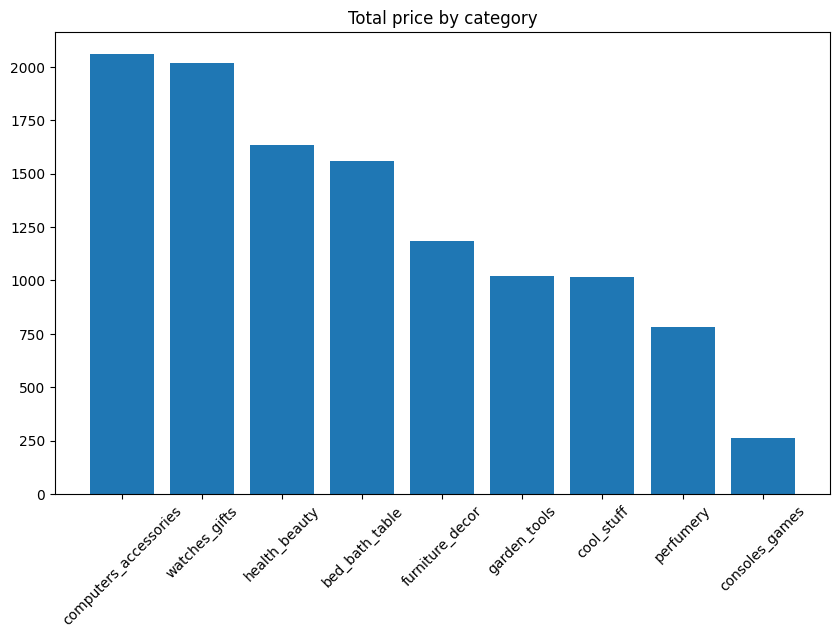

In [15]:
def total_price_by_category(df):
    """
    Plot total price by category using plt.hbar
    """
    df = df[["product_category_name", "total_price"]].groupby("product_category_name").mean().sort_values(by="total_price", ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df["total_price"])
    plt.title("Total price by category")
    plt.xticks(rotation=45)
    plt.savefig("total_price_by_category.png")
    plt.show()
total_price_by_category(df)

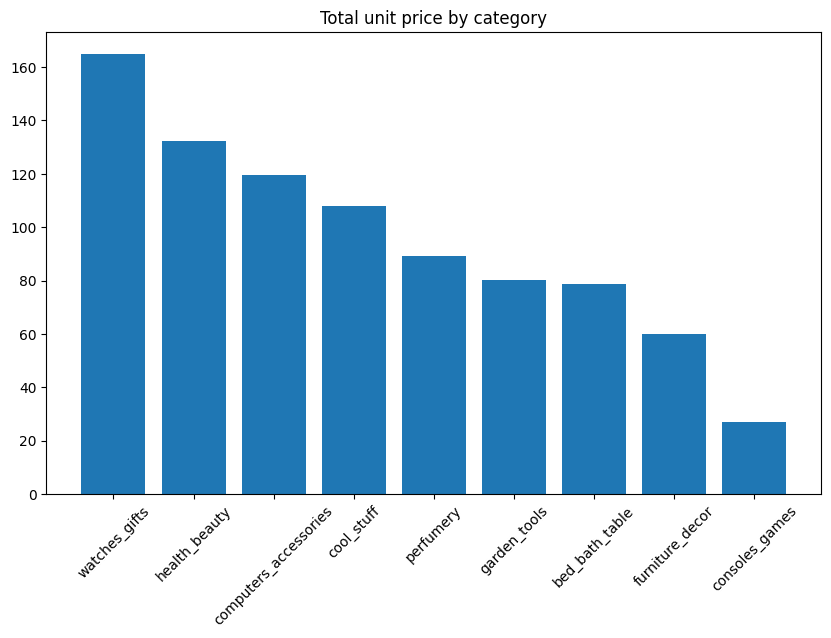

In [16]:
def mean_unit_price_by_category(df):
    """
    Plot mean unit price by category using plt.hbar
    """
    df = df[["unit_price", "product_category_name"]].groupby("product_category_name").mean().sort_values(by="unit_price", ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df["unit_price"])
    plt.title("Total unit price by category")
    plt.xticks(rotation=45)
    plt.savefig("unit_price_by_category.png")
    plt.show()
mean_unit_price_by_category(df)

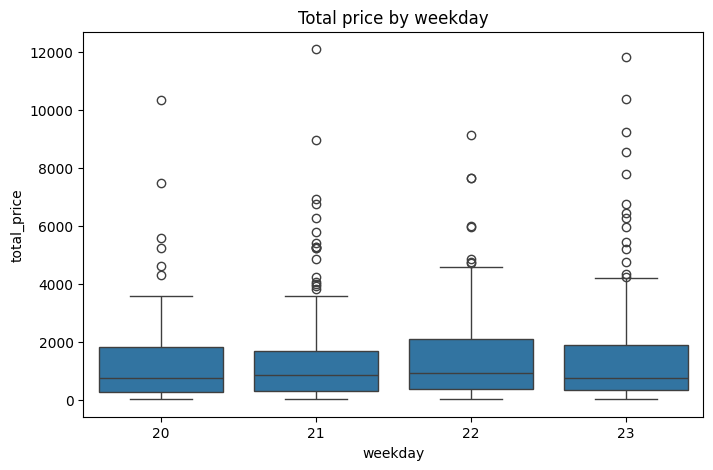

In [17]:
def boxplot_weekday(df):
    """
    Plot boxplot of total price by weekday
    """
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="weekday", y="total_price", data=df)
    plt.title("Total price by weekday")
    plt.savefig("total_price_by_weekday.png")
    plt.show()
boxplot_weekday(df)

Convert month_year column into timestamp

In [18]:
from datetime import datetime
def convert_date_timestamp(row):
    return int(datetime.strptime(row["month_year"], '%d-%m-%Y').timestamp())
df["month_year"] = df.apply(convert_date_timestamp, axis=1)

Correlation matrix

In [19]:
correlation_matrix = df.drop(["product_category_name", "product_id", "month_year"], axis=1).corr()
correlation_matrix.shape

(27, 27)

In [20]:
# Get indices where correlation_matrix is greater than 0.5
indices = np.where(correlation_matrix > 0.65)

# The result is a tuple of arrays, where the first array represents row indices and the second array represents column indices.
# We can iterate over these indices and print them:

for row, col in zip(*indices):
    if row != col:  # Ignore diagonal elements
        row_name = correlation_matrix.index[row]
        col_name = correlation_matrix.columns[col]
        print(f"Row: {row_name:20s} - Col: {col_name:25s}, Value: {correlation_matrix.iloc[row, col]:10.6f}")

Row: qty                  - Col: total_price              , Value:   0.749605
Row: total_price          - Col: qty                      , Value:   0.749605
Row: freight_price        - Col: product_weight_g         , Value:   0.670689
Row: unit_price           - Col: lag_price                , Value:   0.994453
Row: product_weight_g     - Col: freight_price            , Value:   0.670689
Row: comp_1               - Col: comp_3                   , Value:   0.650433
Row: comp_3               - Col: comp_1                   , Value:   0.650433
Row: lag_price            - Col: unit_price               , Value:   0.994453


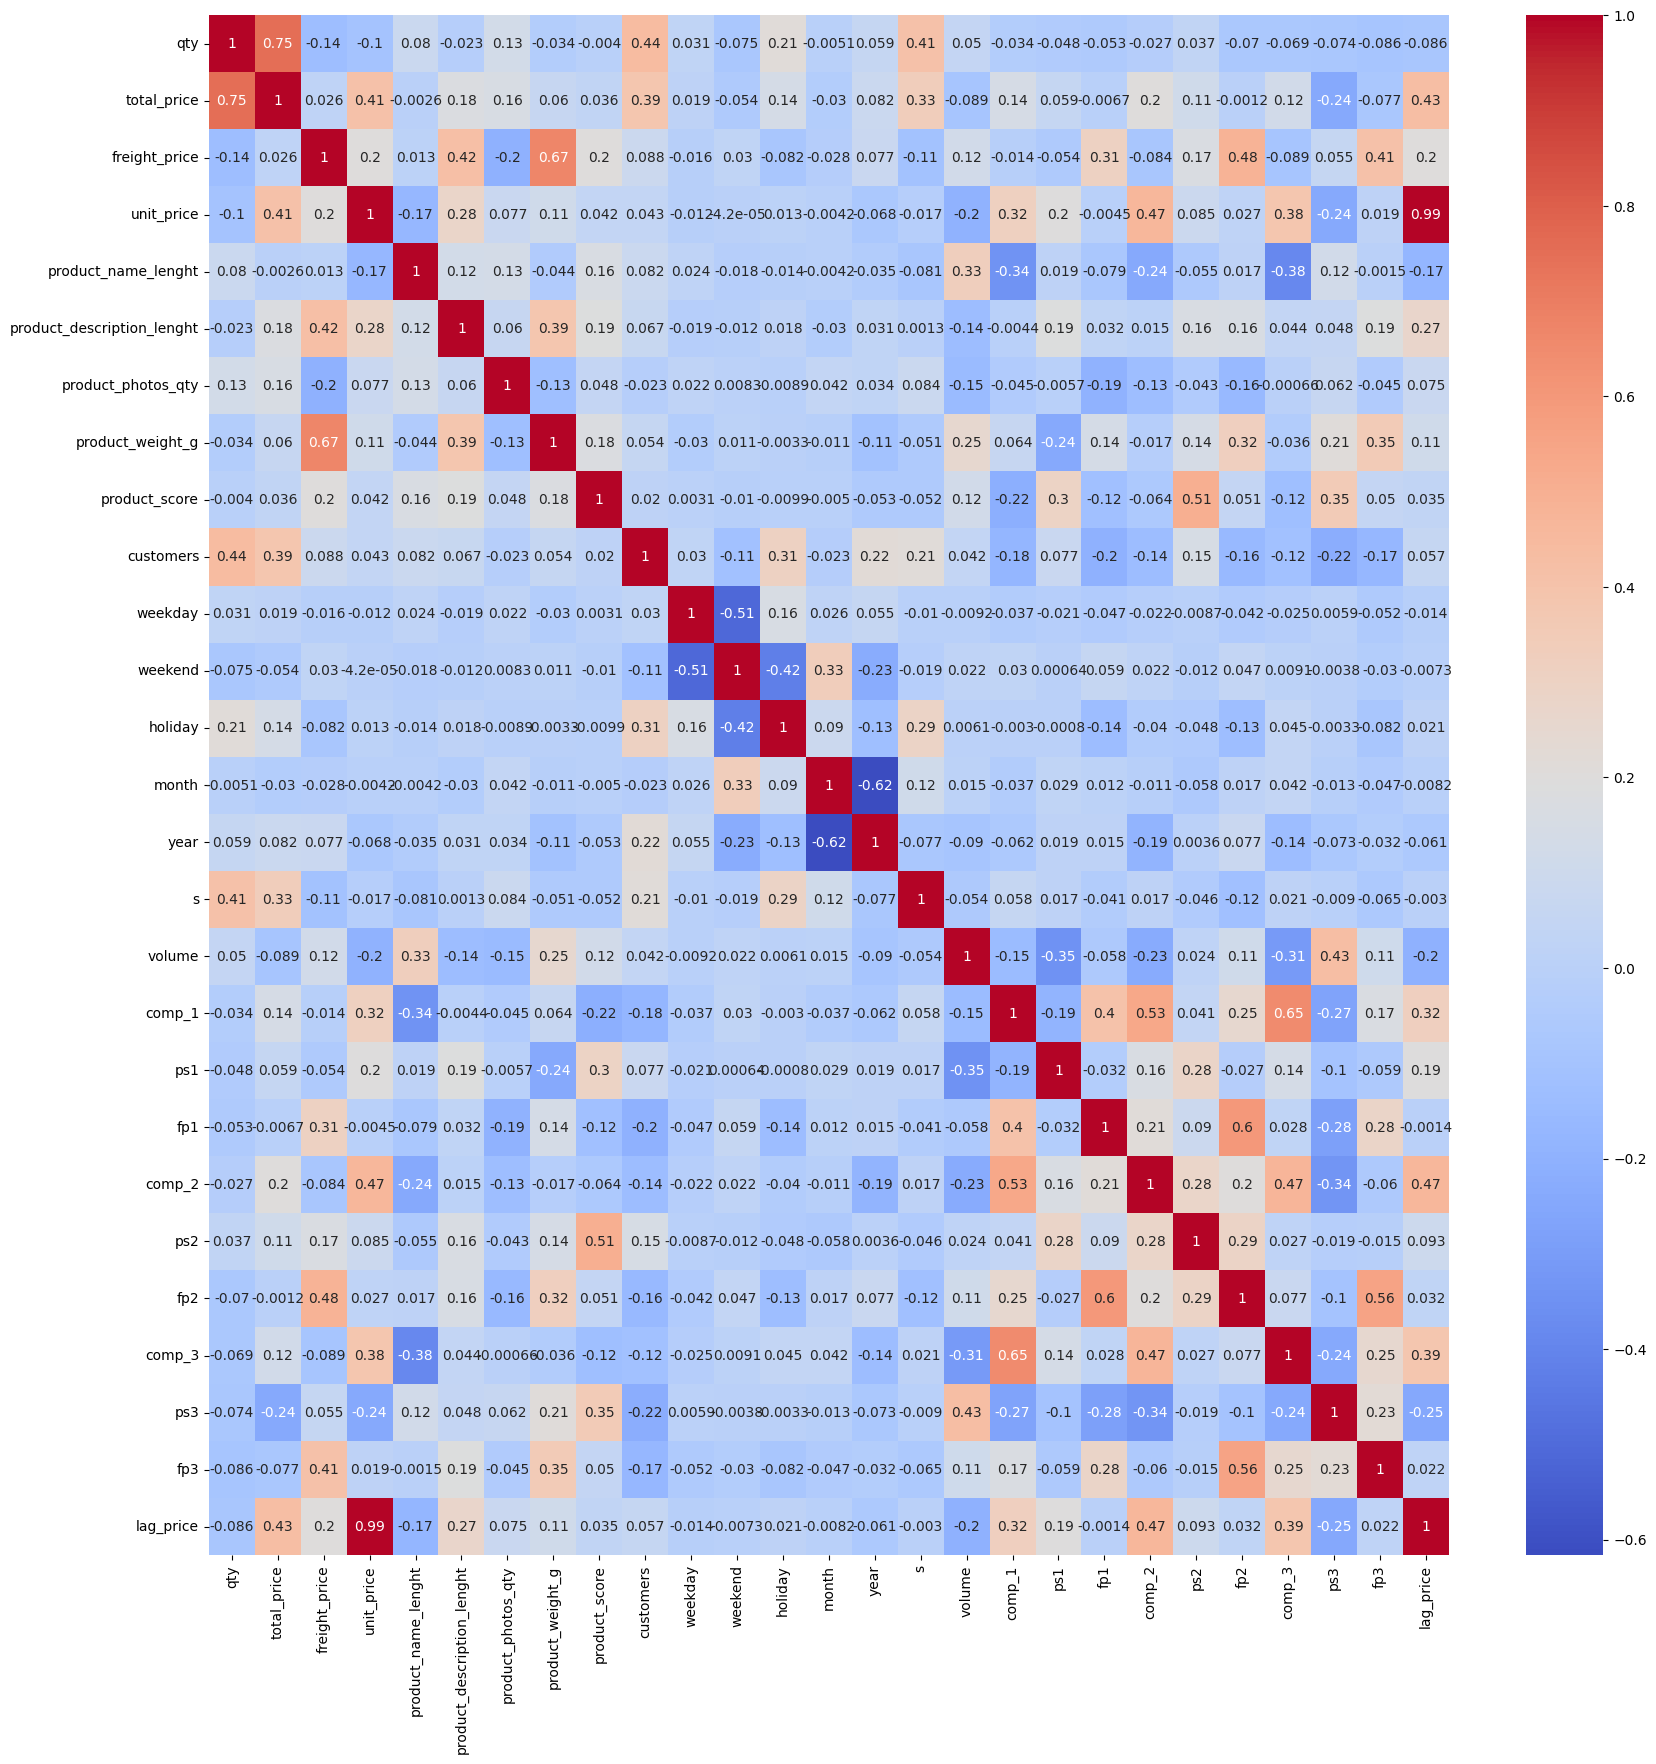

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig("correlation_matrix.png")

Model

Onehot enconding

In [22]:
onehot_category = pd.get_dummies(df["product_category_name"], dtype=np.int8)
def get_id(row):
    return int(row["product_id"][len(row["product_category_name"].split("_")[0]):])
df["id"] = df.apply(get_id, axis=1)
onehot_id = pd.get_dummies(df["id"], dtype=np.int8)
df = pd.concat([df, onehot_category, onehot_id], axis=1)
df.columns = df.columns.astype(str)
df.shape

(676, 50)

In [23]:
df.drop(["product_category_name", "product_id", "month_year"], axis=1, inplace=True)
print(df.shape)
df.columns

(676, 47)


Index(['qty', 'total_price', 'freight_price', 'unit_price',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
       'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       'lag_price', 'id', 'bed_bath_table', 'computers_accessories',
       'consoles_games', 'cool_stuff', 'furniture_decor', 'garden_tools',
       'health_beauty', 'perfumery', 'watches_gifts', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10'],
      dtype='object')

Normalize data

In [24]:
# normalize df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Split data

In [25]:
def split_by_time(df, year, month):
    df["year"] = df["year"].astype(int)
    df["month"] = df["month"].astype(int)
    train = df[(df["year"] < year) | ((df["year"] == year) & (df["month"] < month))]
    # test = df[(df["year"] > year) | ((df["year"] == year) & (df["month"] >= month))]
    test = df[(df["year"] == year) & (df["month"] == month)]
    train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
    test = pd.DataFrame(scaler.transform(test), columns=test.columns)
    # print(f"Train shape: {train.shape}, Test shape: {test.shape}")
    return train, test

def split_X_y(df):
    X = df.drop(["unit_price", "lag_price", "total_price", "qty", "year", "month"], axis=1)
    y = df["unit_price"]
    # print(f"Features shape: {X.shape}, Target shape: {y.shape}")
    return X, y

Model

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [27]:
eval = {
}

In [28]:
test_months = [1, 2, 3, 4, 5, 6, 7, 8]
regressors = [LinearRegression(), RandomForestRegressor(), Ridge(), Lasso(), DecisionTreeRegressor(), XGBRegressor()]

In [29]:
for model in regressors:
    name = model.__class__.__name__
    print("Model ", name)
    if name in eval:
            continue
    eval[name] = {
        "r2": [],
        "mae": [],
        "mape": [],
    }
    for month in test_months:
        # print(month)
        train, test = split_by_time(df, 2018, month)
        X_train, y_train = split_X_y(train)
        X_test, y_test = split_X_y(test)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        eval[name]["mae"].append(mae)
        eval[name]["mape"].append(mape)
        eval[name]["r2"].append(r2)

Model  LinearRegression
Model  RandomForestRegressor
Model  Ridge
Model  Lasso
Model  DecisionTreeRegressor
Model  XGBRegressor


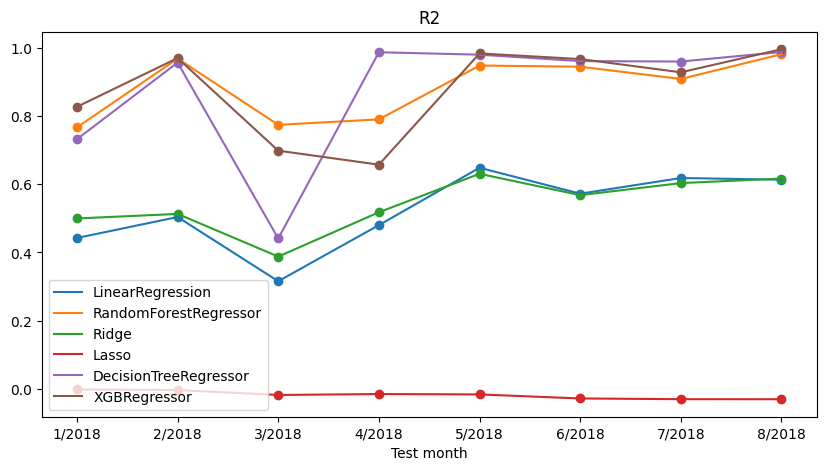

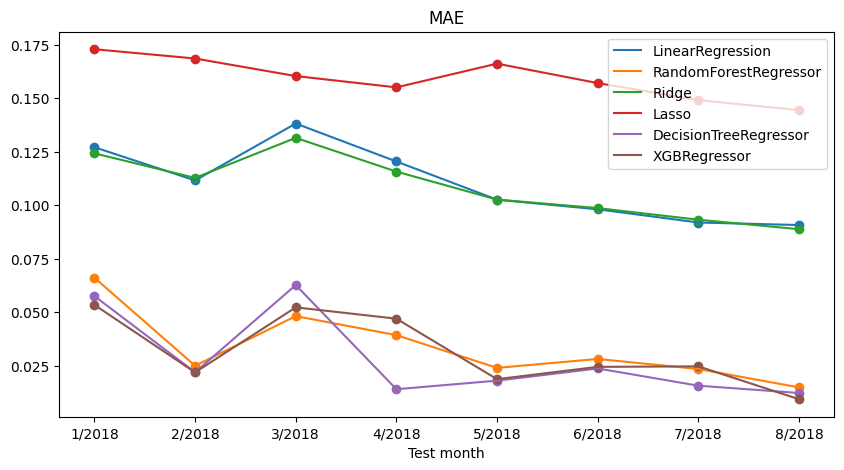

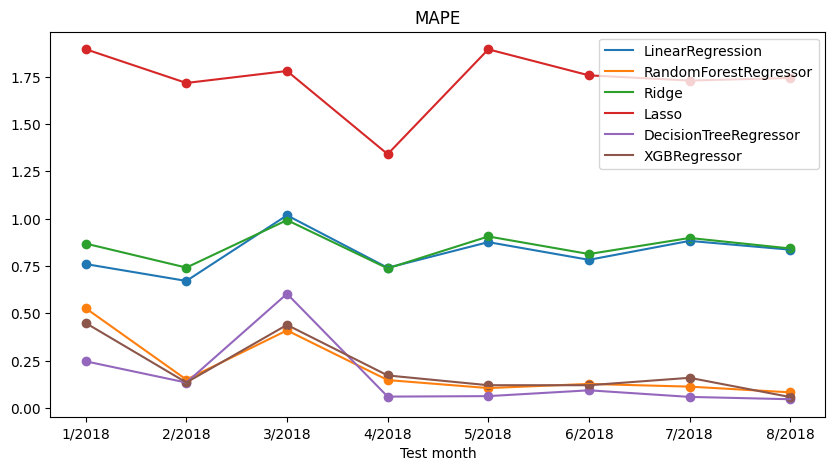

In [30]:
#plot eval results
eval_methods = [
    "r2",
    "mae",
    "mape"
]
for method in eval_methods:
    plt.figure(figsize=(10, 5))
    for model in regressors:
        plt.plot([f"{str(m)}/2018" for m in test_months], eval[model.__class__.__name__][method], label=model.__class__.__name__)
        plt.scatter([f"{str(m)}/2018" for m in test_months], eval[model.__class__.__name__][method])
    plt.xlabel("Test month")
    plt.legend()
    plt.title(method.upper())
    plt.savefig(f"{method}.png")
    plt.show()

In [31]:
X, y = split_X_y(train)

LinearRegression
RandomForestRegressor


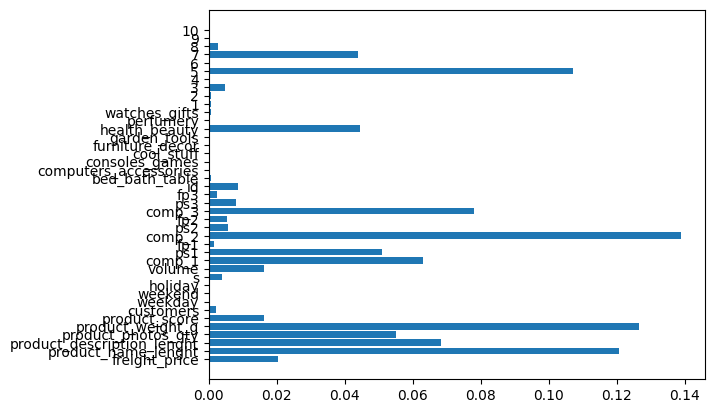

Ridge
Lasso
DecisionTreeRegressor


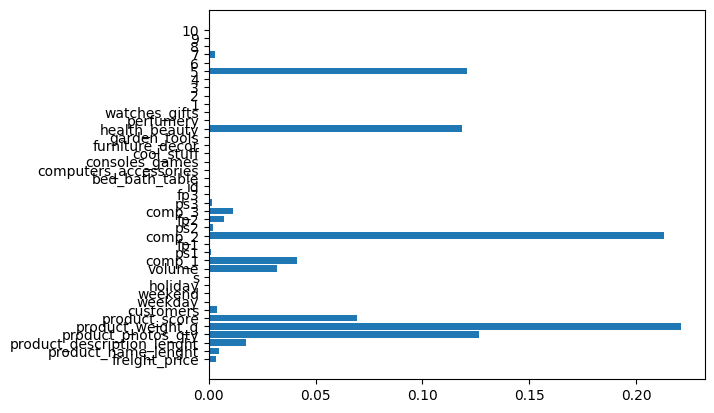

XGBRegressor


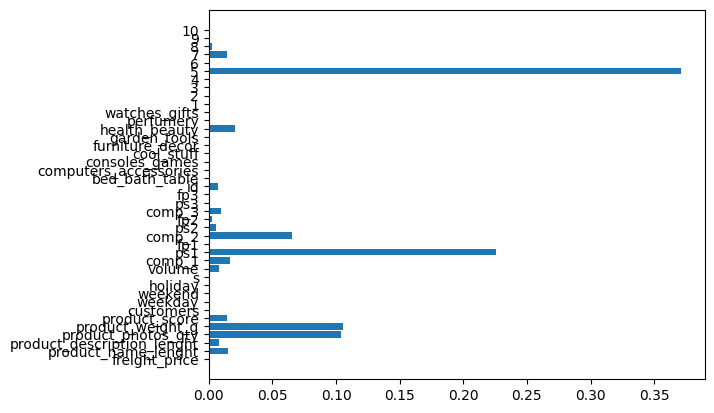

In [33]:
for reg in regressors:
    print(reg.__class__.__name__)
    if reg.__class__.__name__ in ["LinearRegression", "Lasso", "Ridge"]:
        continue
    plt.barh(X.columns, reg.feature_importances_)
    plt.savefig(f"{reg.__class__.__name__}.png")
    plt.show()

    #plt.xticks(rotation=90)